In [1]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

C:\David\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# define the nn layers
def add_layer(inputs, n_features, n_units, activation = None):
    W = tf.Variable(tf.random_normal([n_features,n_units]))
    Bias = tf.Variable(tf.ones([1,n_units])/2)
    Wx_plus_b = tf.matmul(inputs, W) + Bias
    if activation is None:
        return Wx_plus_b
    else:
        return activation(Wx_plus_b)

the loss = 253.98736572265625
--------------------------------
the loss = 14.789249420166016
--------------------------------
the loss = 12.107540130615234
--------------------------------
the loss = 11.475521087646484
--------------------------------
the loss = 11.000603675842285
--------------------------------
the loss = 10.541145324707031
--------------------------------
the loss = 10.124309539794922
--------------------------------


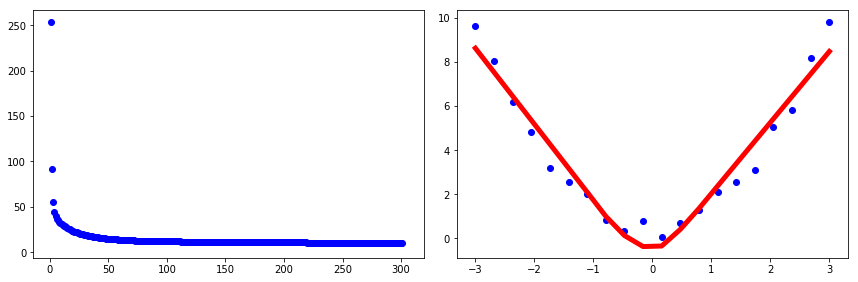

In [3]:
# to create the training data
x_data = np.linspace(-3,3,20).reshape(-1,1).astype(np.float32)
y_data = x_data**2 + np.random.rand(20,1).astype(np.float32)

# ---------------building nn structure----------------------#
X = tf.placeholder(tf.float32,[None,1])
Y = tf.placeholder(tf.float32,[None,1])

hidden = add_layer(X,1,10,activation=tf.nn.relu)
output = add_layer(hidden,10,1,activation=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(output - Y)))

train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
# ---------------building nn structure----------------------#

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# ---------------start the model----------------------#
for step in range(301):
    
    sess.run(train_step, feed_dict = {X:x_data, Y: y_data})
    loss_val = sess.run(loss, feed_dict = {X:x_data, Y: y_data})
    ax1.scatter((step+1), loss_val, c = 'b')
    
    if step % 50 == 0:
        print("the loss = {}".format(loss_val))
        print("--------------------------------")
    if step == 300:
        predicts = sess.run(output, feed_dict = {X:x_data, Y: y_data})
        ax2.scatter(x_data, y_data, c = 'b')
        ax2.plot(x_data, predicts, 'r-', lw = 5)
        

plt.tight_layout(True)
plt.show()